In [1]:
# Imports
from matplotlib import pyplot as py
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import csv
import io
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten,Dense



# importing the models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


directory = r"D:\Fall 2021 Course\IS 733 - Data Mining\Project\train_data.csv"

# Open train_data.csv files
df_healthcare = pd.read_csv(directory, na_filter=True)

from sklearn.cluster import KMeans # Kmeans Clustering
from xgboost import XGBClassifier # Ensemble method (Xxtreme Gradient Boosting)
from sklearn.cluster import KMeans # Clustering


In [2]:
# Working with above file (df)
print(df_healthcare.shape)
print(df_healthcare.head(10))
print(df_healthcare.isnull().values.any())
df_healthcare_null = df_healthcare[df_healthcare.isnull().any(axis=1)]
print(df_healthcare_null.head(10))

(318438, 18)
   case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   
5        6             23                  a                   6   
6        7             32                  f                   9   
7        8             23                  a                   6   
8        9              1                  d                  10   
9       10             10                  e                   1   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2            

In [3]:
# dropping null rows and not needed columns
df_healthcare = df_healthcare.dropna()
print(df_healthcare.shape)
df_healthcare.drop("case_id",inplace=True, axis=1) # dropping case_id column
df_healthcare.drop("City_Code_Hospital",inplace=True, axis=1) # dropping City_Code_Hospital column
df_healthcare.drop("Hospital_region_code",inplace=True, axis=1)
df_healthcare.drop("Available Extra Rooms in Hospital",inplace=True, axis=1)
df_healthcare.drop("Ward_Facility_Code",inplace=True, axis=1)
df_healthcare.drop("Bed Grade",inplace=True, axis=1)
df_healthcare.drop("patientid",inplace=True, axis=1)
df_healthcare.drop("City_Code_Patient",inplace=True, axis=1)
#df_healthcare.drop("Visitors with Patient",inplace=True, axis=1)
df_healthcare = df_healthcare.head(25000)
df_healthcare_1 = df_healthcare.copy()


(313793, 18)


In [4]:
df_healthcare.head(10)

,Hospital_code,Hospital_type_code,Department,Ward_Type,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,radiotherapy,R,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,radiotherapy,S,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,anesthesia,S,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,radiotherapy,R,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,radiotherapy,S,Trauma,Extreme,2,51-60,5558.0,41-50
5,23,a,anesthesia,S,Trauma,Extreme,2,51-60,4449.0,11-20
6,32,f,radiotherapy,S,Emergency,Extreme,2,51-60,6167.0,0-10
7,23,a,radiotherapy,Q,Trauma,Extreme,2,51-60,5571.0,41-50
8,1,d,gynecology,R,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,e,gynecology,S,Trauma,Extreme,2,51-60,6056.0,31-40


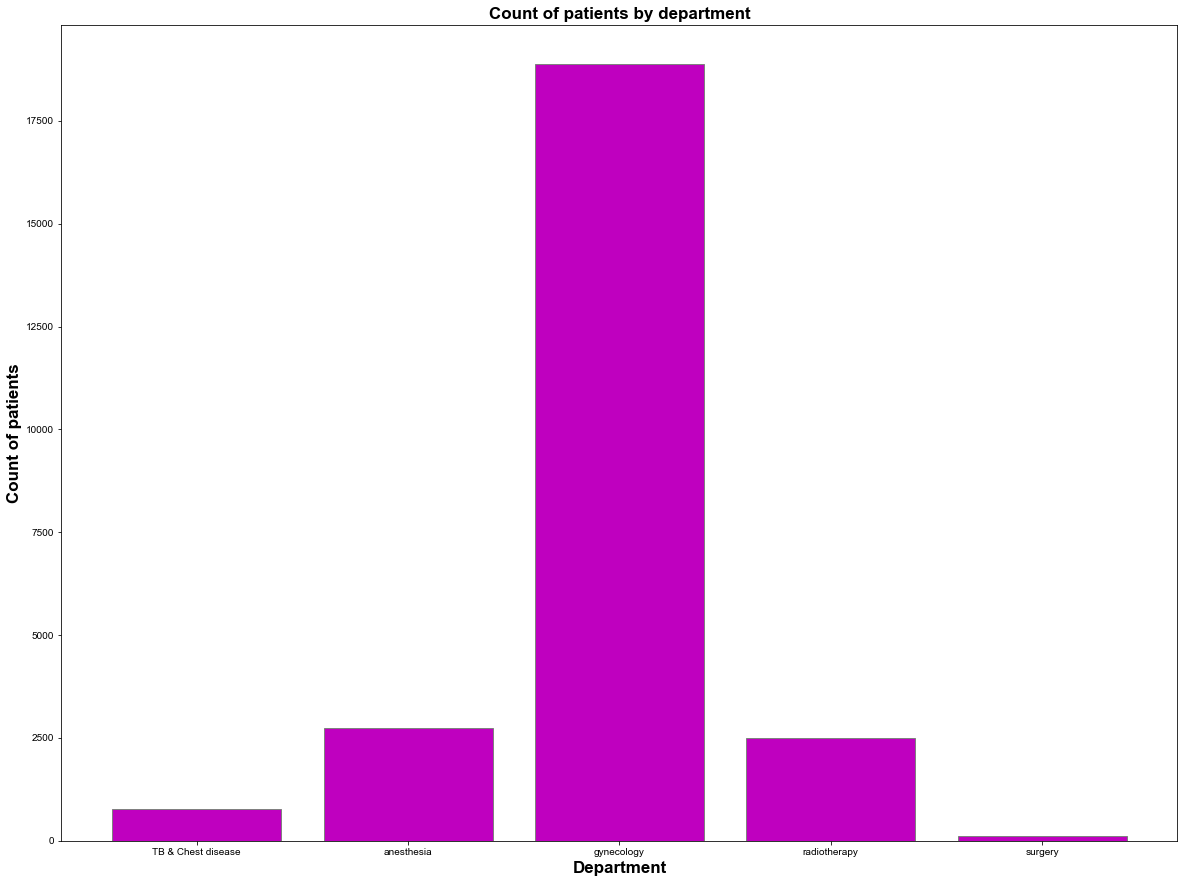

In [5]:
# Distribution of admission by hospital department

department_dict = dict(df_healthcare.groupby('Department').size())

plt.rcParams["figure.figsize"] = (20,15)

plt.bar(x=department_dict.keys(), height=department_dict.values(),color ='m', edgecolor ='grey')
sns.set(font_scale=1.5)


plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Count of patients', fontweight ='bold', fontsize = 17)
plt.title('Count of patients by department', fontweight ='bold', fontsize = 17)
print('\n\n')
plt.show()

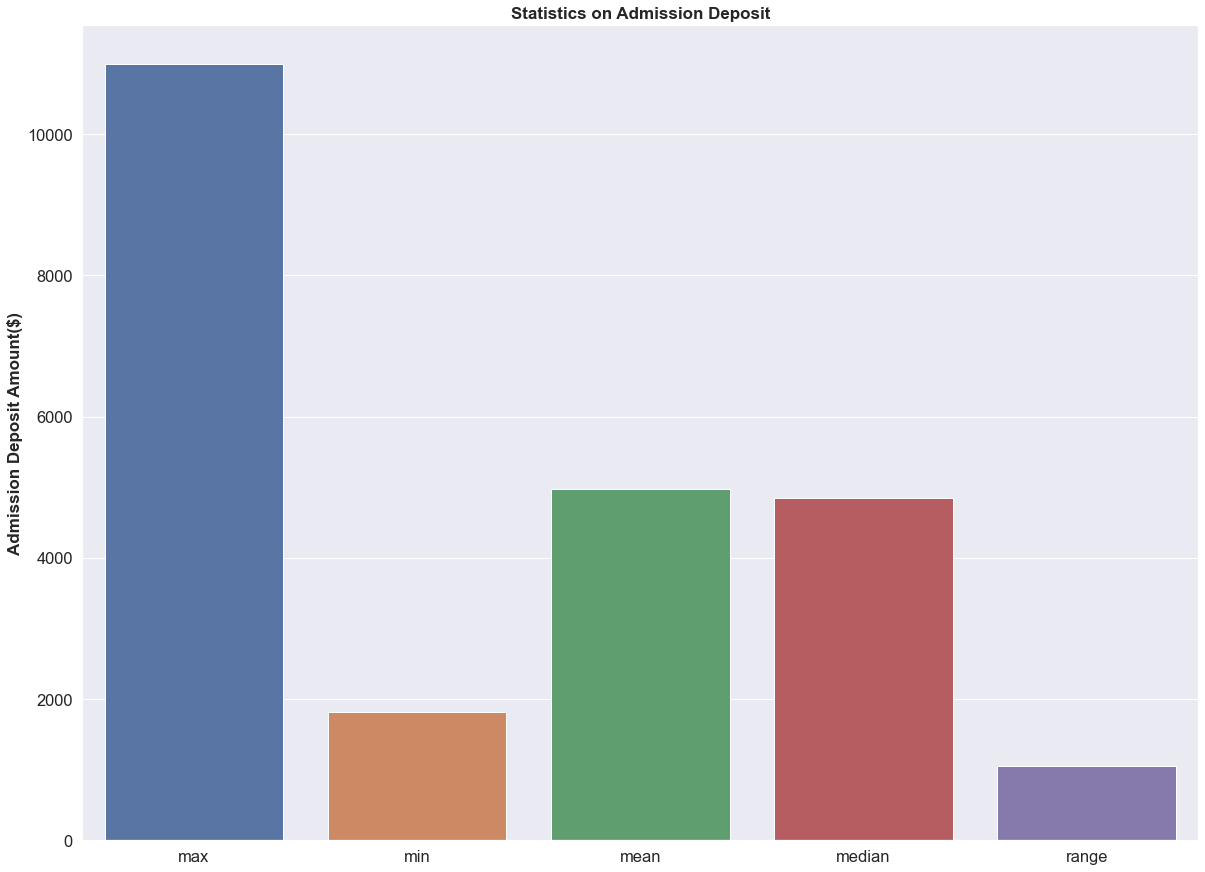

In [6]:
# Plotting the mean, median, min, max and standard deviations of admission deposit 

df_max = df_healthcare["Admission_Deposit"].max()
df_min = df_healthcare["Admission_Deposit"].min()
df_mean = df_healthcare["Admission_Deposit"].mean()
df_median = df_healthcare["Admission_Deposit"].median()
df_std = df_healthcare["Admission_Deposit"].std()
x = ["max","min","mean","median","range"]
y = [df_max,df_min,df_mean,df_median,df_std]

plt.rcParams["figure.figsize"] = (20,15)
sns.set(font_scale=1.5)

sns.barplot(x = x, y = y)
plt.title('Statistics on Admission Deposit', fontweight ='bold', fontsize = 17)
plt.ylabel('Admission Deposit Amount($)', fontweight ='bold', fontsize = 17)
plt.show()



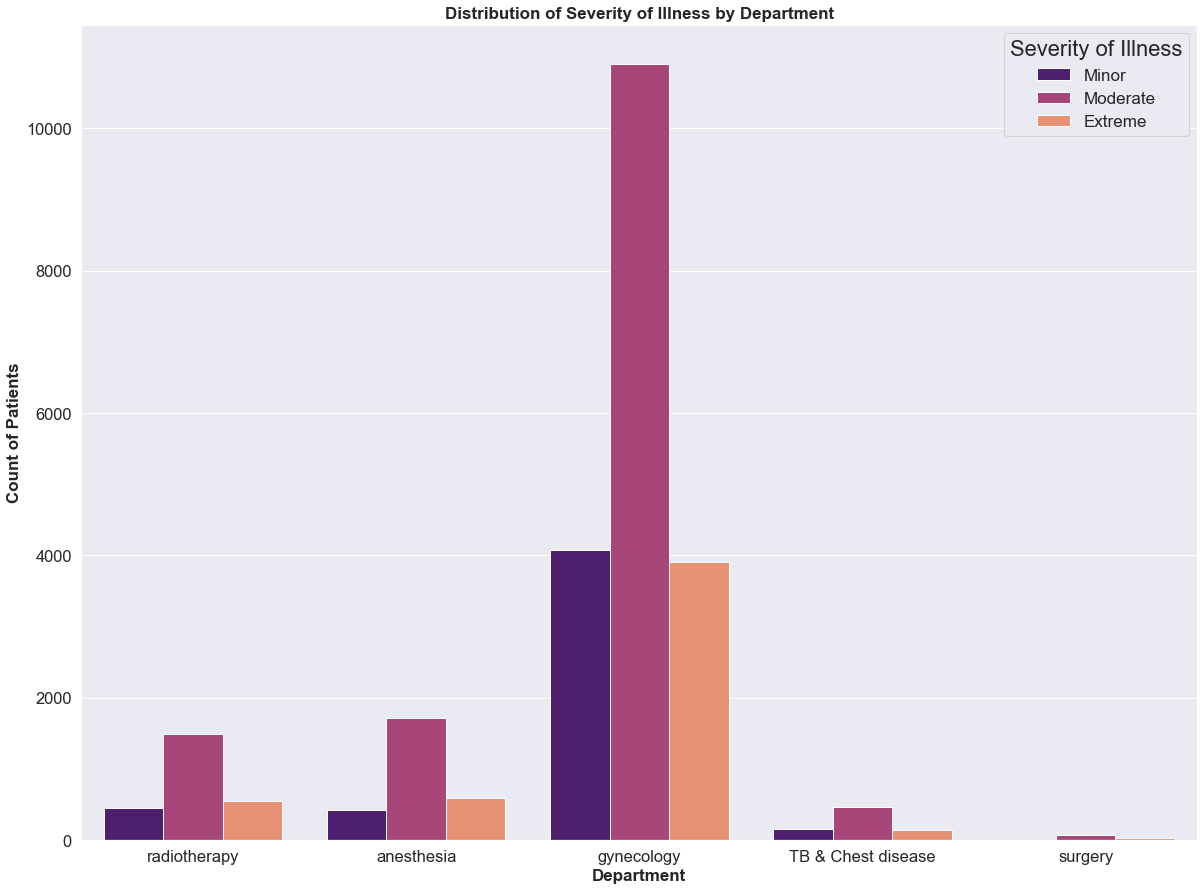

In [7]:
# count plot of severity of illness by department

hue_order = ['Minor',"Moderate","Extreme"]
ax  = sns.countplot(x = 'Department', hue = 'Severity of Illness', hue_order = hue_order, data = df_healthcare, palette = 'magma')
plt.title('Distribution of Severity of Illness by Department', fontweight ='bold', fontsize = 17)
plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Count of Patients', fontweight ='bold', fontsize = 17)
sns.set(font_scale=1.5)
plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.show()

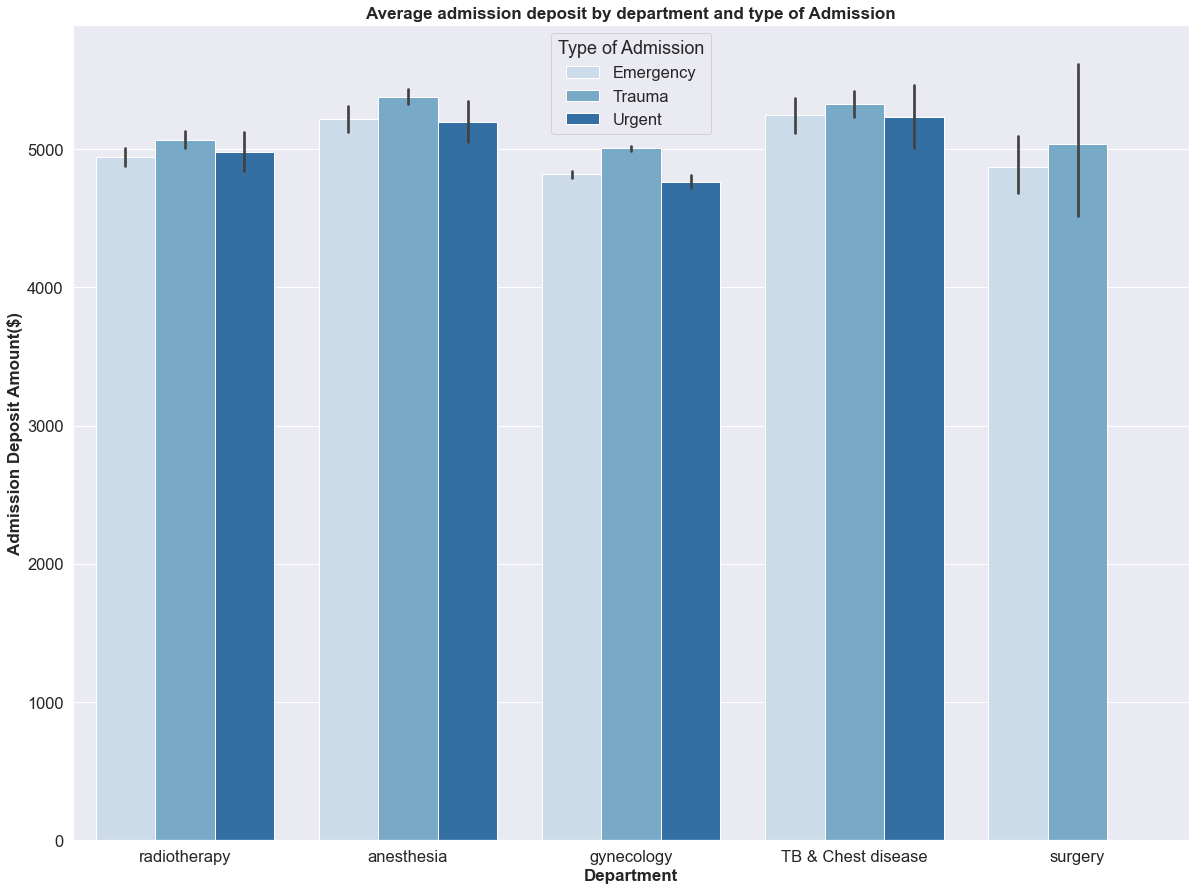

In [8]:
# Average Admission depositby department and type of admission

plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='22')
sns.set(font_scale=1.5)
ax = sns.barplot(x = 'Department', y = 'Admission_Deposit', hue = 'Type of Admission', data = df_healthcare, \
            palette = 'Blues', edgecolor = 'w')
sns.set_style("whitegrid")
df_healthcare.groupby(['Department','Type of Admission']).mean()

plt.title('Average admission deposit by department and type of Admission', fontweight ='bold', fontsize = 17)
plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Admission Deposit Amount($)', fontweight ='bold', fontsize = 17)

plt.show()

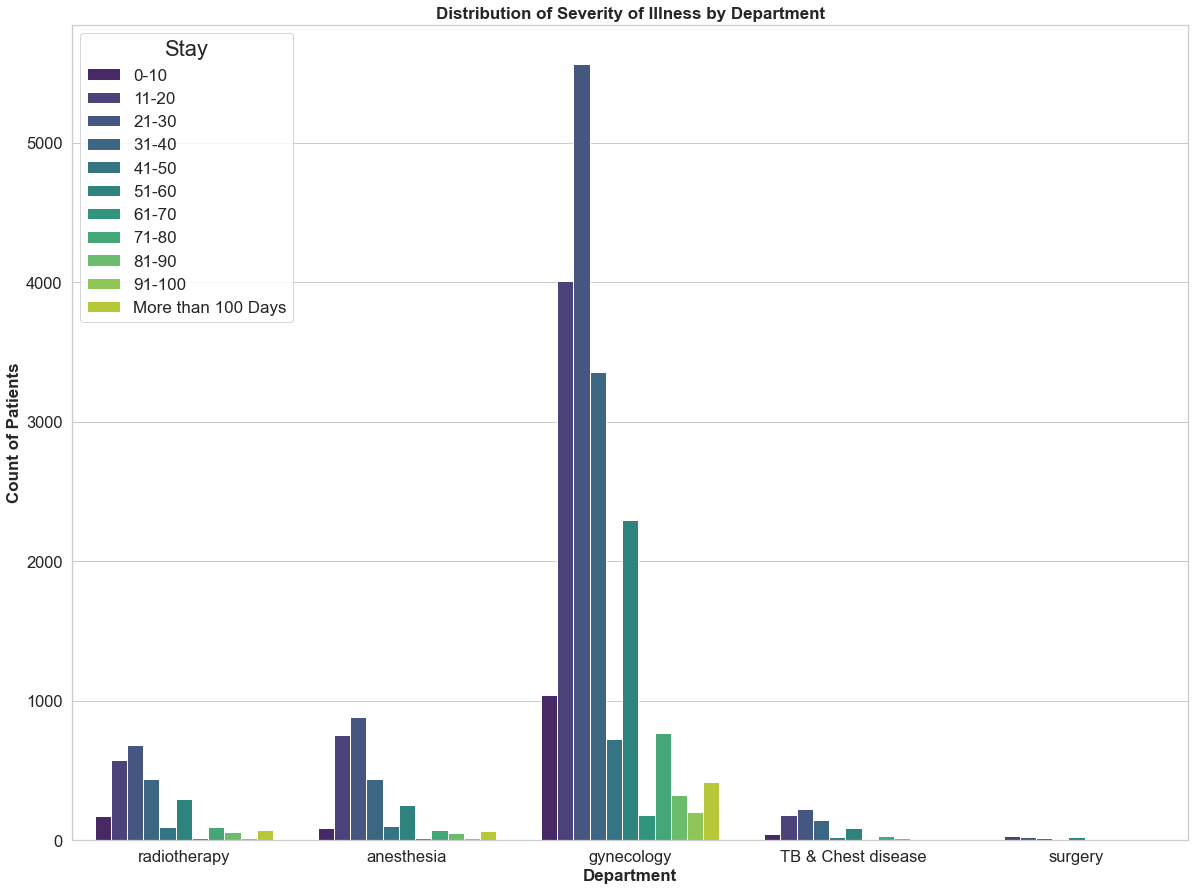

In [9]:
# count plot of length of stay by department

hue_order = ['0-10', '11-20', '21-30','31-40', '41-50', '51-60','61-70', '71-80', '81-90','91-100','More than 100 Days']
ax  = sns.countplot(x = 'Department', hue = 'Stay', hue_order=hue_order, data = df_healthcare, palette = 'viridis')
plt.title('Distribution of Severity of Illness by Department', fontweight ='bold', fontsize = 17)
plt.xlabel('Department', fontweight ='bold', fontsize = 17)
plt.ylabel('Count of Patients', fontweight ='bold', fontsize = 17)
sns.set(font_scale=1.5)
plt.setp(ax.get_legend().get_texts(), fontsize='17')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.show()

In [10]:
df_healthcare.head(30)
#df_healthcare.drop("Admission_Deposit",inplace=True, axis=1)

def normalize_data(dataframe,nameOfColumns):
    for column in nameOfColumns:
        dataframe[column] = (dataframe[column] - dataframe[column].min()) / (dataframe[column].max() - dataframe[column].min()) # performing normalization calculation

nameOfColumns = ['Admission_Deposit']
normalize_data(df_healthcare,nameOfColumns)

In [11]:
# ZeroR algorithm
mydict = []
sumcount = 0
for label_val in pd.unique(df_healthcare.Stay):
    count = df_healthcare.loc[df_healthcare["Stay"].str.contains(label_val)].shape[0]
    sumcount += count
    mydict.append(count)
ZeroR = (max(mydict) / sumcount) * 100
print(ZeroR)

29.532000000000004


In [12]:
# Encoding the non numerical fields
def encode_categorical(dataframe, column):
    dataframe[column] = label_encoder.fit_transform(dataframe[column])
    name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    return name_mapping

Hospital_type_code_name_mapping = encode_categorical(df_healthcare,'Hospital_type_code')
Department_name_mapping = encode_categorical(df_healthcare,'Department')
Ward_Type_name_mapping = encode_categorical(df_healthcare,'Ward_Type')
Type_of_Admission_name_mapping = encode_categorical(df_healthcare,'Type of Admission')
Severity_of_Illness_name_mapping = encode_categorical(df_healthcare,'Severity of Illness')
Age_name_mapping = encode_categorical(df_healthcare,'Age')
Stay_name_mapping = encode_categorical(df_healthcare,'Stay')
Visitors_with_Patient_mapping = encode_categorical(df_healthcare,'Visitors with Patient')



In [13]:
df_healthcare.head(10)

,Hospital_code,Hospital_type_code,Department,Ward_Type,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,0,0,2,5,0.336747,0
1,2,2,3,3,1,0,2,5,0.450376,4
2,10,4,1,3,1,0,2,5,0.318662,3
3,26,1,3,2,1,0,2,5,0.593964,4
4,26,1,3,3,1,0,2,5,0.407234,4
5,23,0,1,3,1,0,2,5,0.286415,1
6,32,5,3,3,0,0,2,5,0.473581,0
7,23,0,3,1,1,0,2,5,0.408650,4
8,1,3,2,2,1,0,2,5,0.588626,5
9,10,4,2,3,1,0,2,5,0.461488,3


In [14]:
# Preparing Datasets for 1R algorithm using univariate logistic
headers = ["Hospital_code","Hospital_type_code","Department","Ward_Type","Type of Admission","Severity of Illness",'Visitors with Patient',"Age","Stay"]

df_Hospital_code = df_healthcare.copy()
df_Hospital_code.drop(['Hospital_type_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Hospital_type_code = df_healthcare.copy()
df_Hospital_type_code.drop(['Hospital_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Department = df_healthcare.copy()
df_Department.drop(['Hospital_type_code','Hospital_code', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient', 'Age'], axis=1, inplace=True)

df_Ward_Type = df_healthcare.copy()
df_Ward_Type.drop(['Hospital_type_code','Hospital_code', 'Department','Type of Admission','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Type_of_Admission = df_healthcare.copy()
df_Type_of_Admission.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Severity_of_Illness = df_healthcare.copy()
df_Severity_of_Illness.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Type of Admission','Visitors with Patient','Age'], axis=1, inplace=True)

df_Visitors_with_Patient = df_healthcare.copy()
df_Visitors_with_Patient.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Age'], axis=1, inplace=True)

df_Age = df_healthcare.copy()
df_Age.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Visitors with Patient'], axis=1, inplace=True)

df_Admission_Deposit = df_healthcare.copy()
df_Admission_Deposit.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Visitors with Patient','Age'], axis=1, inplace=True)


In [15]:
# function to split dataframe
def split_columns(dataframe):
    array = dataframe.values # used to get a numpy representation of the data. Only values are returned. Headers are removed
    InputFields = array[:,:-1] # captures all the fields except for the last which is the output field to be predicted
    OutputLabel = array[:,-1] # captures only the output label to be predicted which is the last field
    return InputFields, OutputLabel

In [16]:
# Calculating OneR prediction (using one variable)
OneR = []
def Logistic(InputFields, OutputLabel):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) 

    results = [] # list to hold the results
    names = [] # list to hold name abbreviations of the algorithms
    for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
        cv_results = cross_val_score(model, InputFields, OutputLabel, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        accuracy = cv_results.mean() * 100
        return accuracy

InputFields, OutputLabel = split_columns(df_Hospital_code)
Hospital_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_code_accuracy)

InputFields, OutputLabel = split_columns(df_Hospital_type_code)
Hospital_type_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_type_code_accuracy)

InputFields, OutputLabel = split_columns(df_Department)
Department_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Department_accuracy)

InputFields, OutputLabel = split_columns(df_Ward_Type)
Ward_Type_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Ward_Type_Accuracy)

InputFields, OutputLabel = split_columns(df_Type_of_Admission)
Type_of_Admission_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Type_of_Admission_Accuracy)

InputFields, OutputLabel = split_columns(df_Severity_of_Illness)
Severity_of_Illness_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Severity_of_Illness_Accuracy)

InputFields, OutputLabel = split_columns(df_Visitors_with_Patient)
Visitors_with_Patient_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Visitors_with_Patient_Accuracy)

InputFields, OutputLabel = split_columns(df_Age)
Age_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Age_Accuracy)

InputFields, OutputLabel = split_columns(df_Admission_Deposit)
df_Admission_Deposit_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(df_Admission_Deposit_Accuracy)

OneRmax = max(OneR)
print(OneRmax)


33.032000000000004


In [17]:
InputFields, OutputLabel = split_columns(df_healthcare)

# this line splits the dataset with training as 70% and test as 30%. The radon_state parameter is used for reproducibility
X_train, X_validation, Y_train, Y_validation = train_test_split(InputFields, OutputLabel, test_size=0.30, random_state=1)


In [18]:
# Removing Outliers
iso = IsolationForest(contamination=0.1) # containment values shoule be between [0, 0.5]
outliers = iso.fit_predict(X_train)
non_outliers = outliers != -1
X_train, Y_train = X_train[non_outliers, :], Y_train[non_outliers]

In [19]:
# getting the algorithms needed to do the predictions
models = [] # list to hold all the algorithms
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Logistic Regression
models.append(('LDA', LinearDiscriminantAnalysis())) # Linear Discriminant Analysis
models.append(('KNN', KNeighborsClassifier())) # K-Nearest Neighbors
models.append(('CART', DecisionTreeClassifier())) # Classification and Regression Trees
models.append(('NB', GaussianNB())) # Gaussian Naive Bayes
models.append(('SVM', SVC(gamma='auto'))) # Support Vector Machines
models.append(('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('XGB', XGBClassifier(use_label_encoder=False)))

models_dict = {}
results = [] # list to hold the results
names = [] # list to hold name abbreviations of the algorithms
for name, model in models:
    model_results = []
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    print(name, ': ',cv_results.mean())
    model_results.append(cv_results.mean() * 100)
    models_dict[name] = model_results

LR :  0.37955555555555553
LDA :  0.383047619047619
KNN :  0.3474920634920635
CART :  0.29301587301587306
NB :  0.37206349206349204
SVM :  0.3942857142857143
Random Forest :  0.3664761904761905
[11:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'm

In [20]:
# adding prior models to the model dictionary
models_dict["Model"] = ["Accuracy Score"]
models_dict["ZeroR"] = [ZeroR]
models_dict["OneR"] = [OneRmax]

In [21]:
# Results
Answer_dict = {}

Answer_dict["Model"] = ["ZeroR","OneR","LR","LDA","KNN","DT","NB","SVM","RF","XGB"]
models_df=pd.DataFrame.from_dict(models_dict,orient='index').transpose() # converting to dataframe

models_df = models_df[["ZeroR","OneR","LR","LDA","KNN","CART","NB","SVM","Random Forest","XGB"]] # re-arranging the columns
models_df.head().style.hide_index() # hides the index while showing the dataframe

ZeroR,OneR,LR,LDA,KNN,CART,NB,SVM,Random Forest,XGB
29.532000,33.032000,37.955556,38.304762,34.749206,29.301587,37.206349,39.428571,36.647619,39.555556


Text(0, 0.5, 'Inertia')

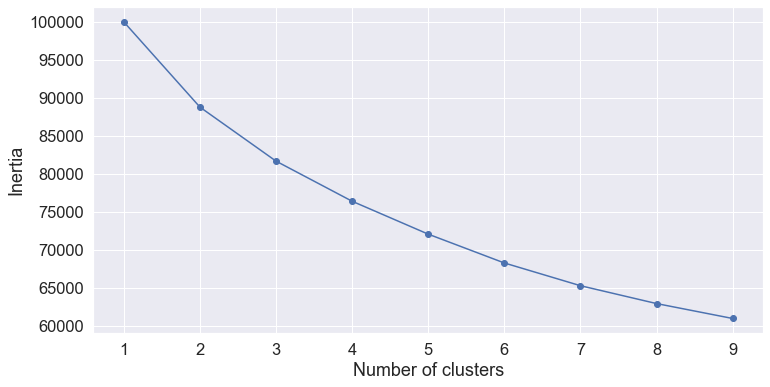

In [22]:
# fitting multiple k-means algorithms and storing the values in an empty list
data_scaled = scaler.fit_transform(df_healthcare.head(10000))
SSE = []
num_of_clusters = range(1,10)
for cluster in num_of_clusters:
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':num_of_clusters, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


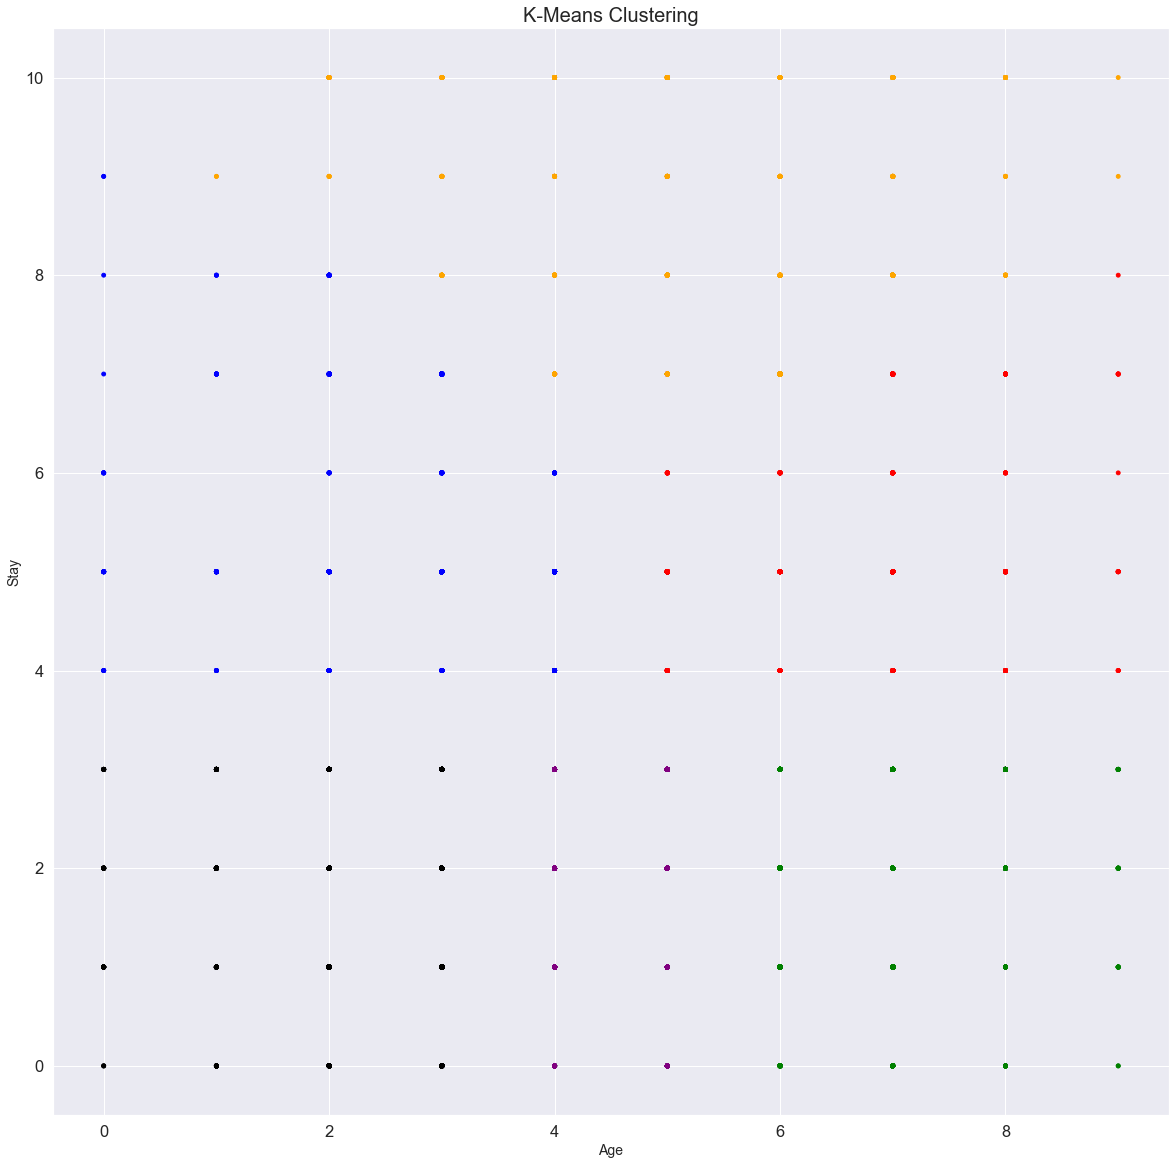

In [23]:
# K-means clustering
df_cluster = df_healthcare.copy()
df_cluster = df_cluster.head(10000)

Kmean = KMeans(n_clusters=6,random_state=2)
df_cluster['pred'] = Kmean.fit_predict(df_cluster[['Age','Stay']])

df_cluster['KMeans_labels']= Kmean.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green','orange','black']
plt.figure(figsize=(20,20))
plt.scatter(df_cluster.Age, df_cluster.Stay,c=df_cluster['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15, alpha=1)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Stay',fontsize=14)
plt.show()


In [24]:
# Changing the class variable to binary (>30 days and less than 30 days)

less_than_a_month = ['0-10','11-20','21-30','31-40']
more_than_a_month = ['31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days']
for entry in less_than_a_month:
    df_healthcare_1['Stay'] = df_healthcare_1['Stay'].replace(entry, 0,regex=True)
                     
for entry in more_than_a_month:
    df_healthcare_1['Stay'] = df_healthcare_1['Stay'].replace(entry, 1,regex=True)
    
# ZeroR algorithm
mydict = []
sumcount = 0
df_healthcare_1.Stay = df_healthcare_1.Stay.astype(str)
for label_val in pd.unique(df_healthcare_1.Stay):
    count = df_healthcare_1.loc[df_healthcare_1["Stay"].str.contains(label_val)].shape[0]
    sumcount += count
    mydict.append(count)
ZeroR = (max(mydict) / sumcount) * 100
df_healthcare_1.Stay = df_healthcare_1.Stay.astype(int)
print(ZeroR)
                    
# encoding
Hospital_type_code_name_mapping = encode_categorical(df_healthcare_1,'Hospital_type_code')
Department_name_mapping = encode_categorical(df_healthcare_1,'Department')
Ward_Type_name_mapping = encode_categorical(df_healthcare_1,'Ward_Type')
Type_of_Admission_name_mapping = encode_categorical(df_healthcare_1,'Type of Admission')
Severity_of_Illness_name_mapping = encode_categorical(df_healthcare_1,'Severity of Illness')
Age_name_mapping = encode_categorical(df_healthcare_1,'Age')
Visitors_with_Patient_mapping = encode_categorical(df_healthcare_1,'Visitors with Patient')


74.7


In [25]:
# Preparing Datasets for 1R algorithm using univariate logistic
headers = ["Hospital_code","Hospital_type_code","Department","Ward_Type","Type of Admission","Severity of Illness",'Visitors with Patient',"Age","Stay"]

df_Hospital_code = df_healthcare_1.copy()
df_Hospital_code.drop(['Hospital_type_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Hospital_type_code = df_healthcare_1.copy()
df_Hospital_type_code.drop(['Hospital_code', 'Department', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient','Age'], axis=1, inplace=True)

df_Department = df_healthcare_1.copy()
df_Department.drop(['Hospital_type_code','Hospital_code', 'Ward_Type','Type of Admission','Severity of Illness', 'Visitors with Patient', 'Age'], axis=1, inplace=True)

df_Ward_Type = df_healthcare_1.copy()
df_Ward_Type.drop(['Hospital_type_code','Hospital_code', 'Department','Type of Admission','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Type_of_Admission = df_healthcare_1.copy()
df_Type_of_Admission.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Visitors with Patient','Age'], axis=1, inplace=True)

df_Severity_of_Illness = df_healthcare_1.copy()
df_Severity_of_Illness.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Type of Admission','Visitors with Patient','Age'], axis=1, inplace=True)

df_Visitors_with_Patient = df_healthcare_1.copy()
df_Visitors_with_Patient.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Age'], axis=1, inplace=True)

df_Age = df_healthcare_1.copy()
df_Age.drop(['Hospital_type_code','Hospital_code', 'Department','Ward_Type','Severity of Illness','Type of Admission','Visitors with Patient'], axis=1, inplace=True)


In [26]:
OneR = []

InputFields, OutputLabel = split_columns(df_Hospital_code)
Hospital_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_code_accuracy)

InputFields, OutputLabel = split_columns(df_Hospital_type_code)
Hospital_type_code_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Hospital_type_code_accuracy)

InputFields, OutputLabel = split_columns(df_Department)
Department_accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Department_accuracy)

InputFields, OutputLabel = split_columns(df_Ward_Type)
Ward_Type_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Ward_Type_Accuracy)

InputFields, OutputLabel = split_columns(df_Type_of_Admission)
Type_of_Admission_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Type_of_Admission_Accuracy)

InputFields, OutputLabel = split_columns(df_Severity_of_Illness)
Severity_of_Illness_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Severity_of_Illness_Accuracy)

InputFields, OutputLabel = split_columns(df_Visitors_with_Patient)
Visitors_with_Patient_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Visitors_with_Patient_Accuracy)

InputFields, OutputLabel = split_columns(df_Age)
Age_Accuracy = Logistic(InputFields, OutputLabel)
OneR.append(Age_Accuracy)

OneRmax = max(OneR)
print(OneR)
print(OneRmax)

[74.70000000000002, 74.70000000000002, 74.70000000000002, 74.74400000000001, 74.70000000000002, 74.70000000000002, 79.324, 74.70000000000002]
79.324


In [142]:
print (df_healthcare_1.head(10))
InputFields, OutputLabel = split_columns(df_healthcare_1)

# this line splits the dataset with training as 70% and test as 30%. The radon_state parameter is used for reproducibility
X_train, X_validation, Y_train, Y_validation = train_test_split(InputFields, OutputLabel, test_size=0.30, random_state=1)


   Hospital_code  Hospital_type_code  Department  Ward_Type  \
0              8                   2           3          2   
1              2                   2           3          3   
2             10                   4           1          3   
3             26                   1           3          2   
4             26                   1           3          3   
5             23                   0           1          3   
6             32                   5           3          3   
7             23                   0           3          1   
8              1                   3           2          2   
9             10                   4           2          3   

   Type of Admission  Severity of Illness  Visitors with Patient  Age  \
0                  0                    0                      2    5   
1                  1                    0                      2    5   
2                  1                    0                      2    5   
3             

In [143]:
# Removing Outliers
iso = IsolationForest(contamination=0.1) # containment values shoule be between [0, 0.5]
outliers = iso.fit_predict(X_train)
non_outliers = outliers != -1
X_train, Y_train = X_train[non_outliers, :], Y_train[non_outliers]

In [54]:
# getting the algorithms needed to do the predictions
models = [] # list to hold all the algorithms
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Logistic Regression
models.append(('LDA', LinearDiscriminantAnalysis())) # Linear Discriminant Analysis
models.append(('KNN', KNeighborsClassifier())) # K-Nearest Neighbors
models.append(('CART', DecisionTreeClassifier())) # Classification and Regression Trees
models.append(('NB', GaussianNB())) # Gaussian Naive Bayes
models.append(('SVM', SVC(gamma='auto'))) # Support Vector Machines
models.append(('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)))
models.append(('XGB', XGBClassifier(use_label_encoder=False)))
models_dict = {}
results = [] # list to hold the results
names = [] # list to hold name abbreviations of the algorithms
for name, model in models:
    print (name)
    print (model)
    model_results = []
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    cv_results1 = cross_val_score(model, InputFields, OutputLabel, cv=kfold, scoring='roc_auc')
    model_results.append(cv_results1.mean())
    model_results.append(cv_results.mean() * 100)
    models_dict[name] = model_results
    print(name, ': ',cv_results.mean())

LR
LogisticRegression(multi_class='ovr', solver='liblinear')
LR :  0.8153089176063775
LDA
LinearDiscriminantAnalysis()
LDA :  0.8313938743028688
KNN
KNeighborsClassifier()
KNN :  0.7575300626186354
CART
DecisionTreeClassifier()
CART :  0.7662791531006229
NB
GaussianNB()
NB :  0.8234220173532553
SVM
SVC(gamma='auto')
SVM :  0.7797533078585343
Random Forest
RandomForestClassifier(max_depth=2, random_state=0)
Random Forest :  0.7843388214637292
XGB
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
        

In [165]:
# adding prior models to the model dictionary
models_dict["Model"] = ["AUC", "Accuracy"]
models_dict["ZeroR"] = ["N/A", ZeroR]
models_dict["OneR"] = ["N/A", OneRmax]


In [166]:
# Results
Answer_dict = {}

Answer_dict["AUC"] = ["N/A","N/A",models_dict["LR"],models_dict["LDA"],models_dict["KNN"],models_dict["CART"],models_dict["NB"],models_dict["SVM"],models_dict["Random Forest"],models_dict["XGB"]]
models_df=pd.DataFrame.from_dict(models_dict,orient='index').transpose() # converting to dataframe


models_df = models_df[["Model","ZeroR","OneR","LR","LDA","KNN","CART","NB","SVM","Random Forest","XGB"]] # re-arranging the columns
models_df.head().style.hide_index() # hides the index while showing the dataframe

Model,ZeroR,OneR,LR,LDA,KNN,CART,NB,SVM,Random Forest,XGB
AUC,N/A,N/A,0.783429,0.813389,0.624847,0.689496,0.806335,0.664994,0.815474,0.841408
Accuracy,74.700000,79.324000,81.530892,83.139387,75.753006,76.627915,82.342202,77.975331,78.433882,84.141181


In [168]:
# Evaluate predictions on the validation dataset
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy = (accuracy_score(Y_validation, predictions))*100
F_1 = (classification_report(Y_validation, predictions))
print("XGB Accuracy on Test Data set:", Accuracy,'%')

[[5131  451]
 [ 804 1114]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      5582
         1.0       0.71      0.58      0.64      1918

    accuracy                           0.83      7500
   macro avg       0.79      0.75      0.77      7500
weighted avg       0.83      0.83      0.83      7500

XGB Accuracy on Test Data set: 83.26666666666667 %


No Skill: ROC AUC=0.500
XGB: ROC AUC=0.840


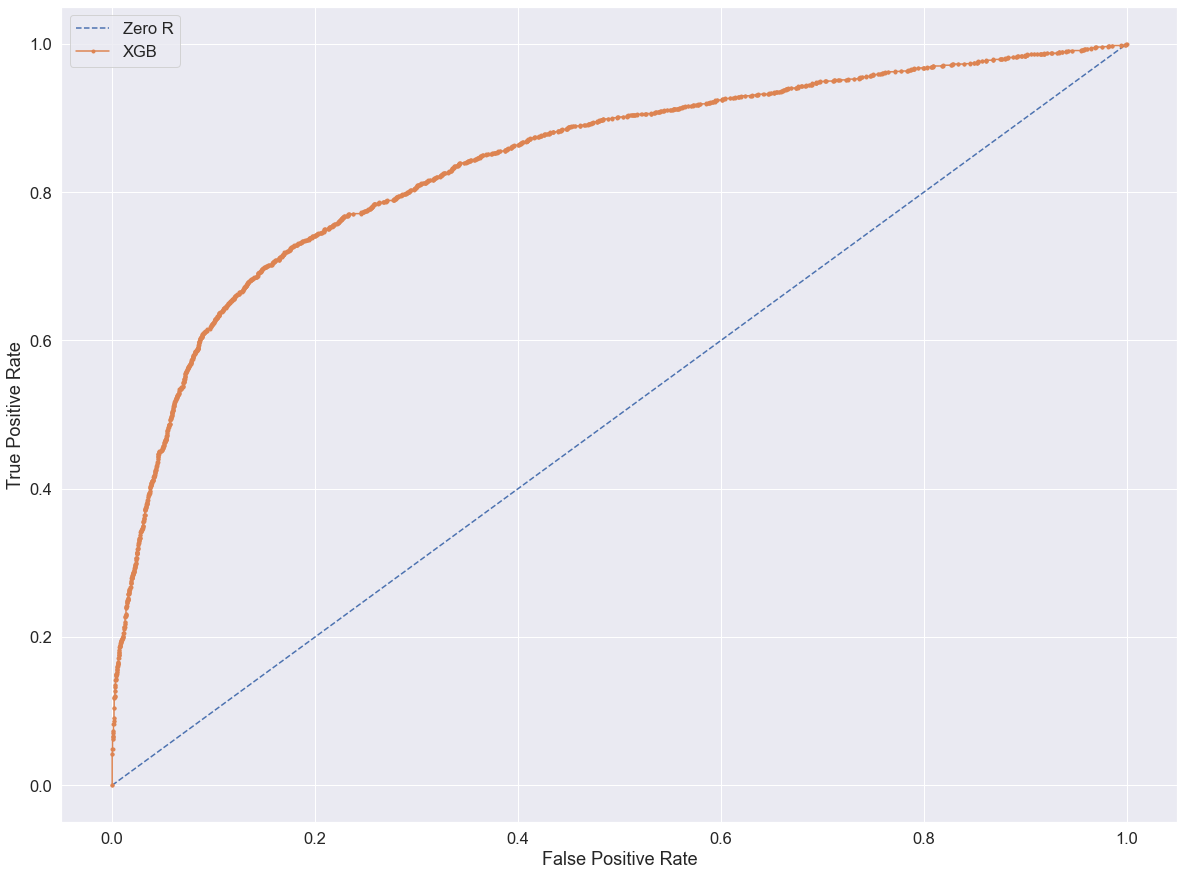

In [169]:
# Calculating and plotting ROC curves
# Using Zero R (predicting majority class all the time)
Zoro_R_probs = [0 for _ in range(len(Y_validation))]
ns_probs = [0 for _ in range(len(Y_validation))]
# predict probabilities using the logistic regression
XGB_probs = model.predict_proba(X_validation)
# limiting the probabilities to just the positive outcome
XGB_probs = XGB_probs[:, 1]
# calculating the scores
ns_auc = roc_auc_score(Y_validation, ns_probs)
XGB_auc = roc_auc_score(Y_validation, XGB_probs)
# Printing the AUC for the Zoro R and LR models
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (XGB_auc))
# calculating ROC curve true positive, false positive, true negative, false negative
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
XGB_fpr, XGB_tpr, _ = roc_curve(Y_validation, XGB_probs)
# plotting the roc curve for the model
py.plot(ns_fpr, ns_tpr, linestyle='--', label='Zero R')
py.plot(XGB_fpr, XGB_tpr, marker='.', label='XGB')
# axis labels
py.xlabel('False Positive Rate')
py.ylabel('True Positive Rate')
# show the legend
py.legend()
py.show()


In [ ]:
'''
Jumman -- Additional experiment recommended by Dr. Chen on 26th December 2021.

1. Figuring out whether there is the sign of overfitting/underfitting.

2. Exploring dimensional reduction to compare with the baseline. 

3. Fitting deep learning model, comparing with the current model performance, tuning parameter as necessary. 

'''

[0]	validation_0-error:0.15225	validation_0-logloss:0.55773	validation_0-rmse:0.42832	validation_0-mae:0.42207	validation_1-error:0.16013	validation_1-logloss:0.56188	validation_1-rmse:0.43069	validation_1-mae:0.42422
[1]	validation_0-error:0.15098	validation_0-logloss:0.48481	validation_0-rmse:0.38815	validation_0-mae:0.36859	validation_1-error:0.16160	validation_1-logloss:0.49225	validation_1-rmse:0.39266	validation_1-mae:0.37250
[2]	validation_0-error:0.14997	validation_0-logloss:0.44142	validation_0-rmse:0.36533	validation_0-mae:0.33049	validation_1-error:0.16027	validation_1-logloss:0.45199	validation_1-rmse:0.37178	validation_1-mae:0.33605


C:\Users\Pralgomathic\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[3]	validation_0-error:0.14946	validation_0-logloss:0.41509	validation_0-rmse:0.35270	validation_0-mae:0.30310	validation_1-error:0.16013	validation_1-logloss:0.42775	validation_1-rmse:0.36033	validation_1-mae:0.30948
[4]	validation_0-error:0.14997	validation_0-logloss:0.39785	validation_0-rmse:0.34505	validation_0-mae:0.28310	validation_1-error:0.15733	validation_1-logloss:0.41224	validation_1-rmse:0.35352	validation_1-mae:0.29028
[5]	validation_0-error:0.14971	validation_0-logloss:0.38644	validation_0-rmse:0.34054	validation_0-mae:0.26837	validation_1-error:0.15720	validation_1-logloss:0.40265	validation_1-rmse:0.34980	validation_1-mae:0.27629
[6]	validation_0-error:0.14876	validation_0-logloss:0.37839	validation_0-rmse:0.33738	validation_0-mae:0.25751	validation_1-error:0.15747	validation_1-logloss:0.39724	validation_1-rmse:0.34796	validation_1-mae:0.26639
[7]	validation_0-error:0.14813	validation_0-logloss:0.37306	validation_0-rmse:0.33545	validation_0-mae:0.24925	validation_1-erro

[41]	validation_0-error:0.12863	validation_0-logloss:0.31792	validation_0-rmse:0.30918	validation_0-mae:0.20828	validation_1-error:0.16160	validation_1-logloss:0.39571	validation_1-rmse:0.34973	validation_1-mae:0.23695
[42]	validation_0-error:0.12768	validation_0-logloss:0.31639	validation_0-rmse:0.30835	validation_0-mae:0.20770	validation_1-error:0.16200	validation_1-logloss:0.39605	validation_1-rmse:0.34984	validation_1-mae:0.23697
[43]	validation_0-error:0.12762	validation_0-logloss:0.31603	validation_0-rmse:0.30815	validation_0-mae:0.20756	validation_1-error:0.16173	validation_1-logloss:0.39616	validation_1-rmse:0.34986	validation_1-mae:0.23700
[44]	validation_0-error:0.12679	validation_0-logloss:0.31511	validation_0-rmse:0.30766	validation_0-mae:0.20696	validation_1-error:0.16160	validation_1-logloss:0.39668	validation_1-rmse:0.35005	validation_1-mae:0.23678
[45]	validation_0-error:0.12679	validation_0-logloss:0.31455	validation_0-rmse:0.30739	validation_0-mae:0.20656	validation_1

[79]	validation_0-error:0.11473	validation_0-logloss:0.28656	validation_0-rmse:0.29123	validation_0-mae:0.19271	validation_1-error:0.16573	validation_1-logloss:0.40469	validation_1-rmse:0.35337	validation_1-mae:0.23517
[80]	validation_0-error:0.11460	validation_0-logloss:0.28635	validation_0-rmse:0.29108	validation_0-mae:0.19258	validation_1-error:0.16547	validation_1-logloss:0.40470	validation_1-rmse:0.35331	validation_1-mae:0.23512
[81]	validation_0-error:0.11448	validation_0-logloss:0.28606	validation_0-rmse:0.29087	validation_0-mae:0.19243	validation_1-error:0.16560	validation_1-logloss:0.40495	validation_1-rmse:0.35346	validation_1-mae:0.23520
[82]	validation_0-error:0.11435	validation_0-logloss:0.28593	validation_0-rmse:0.29079	validation_0-mae:0.19233	validation_1-error:0.16573	validation_1-logloss:0.40508	validation_1-rmse:0.35351	validation_1-mae:0.23518
[83]	validation_0-error:0.11441	validation_0-logloss:0.28573	validation_0-rmse:0.29067	validation_0-mae:0.19223	validation_1

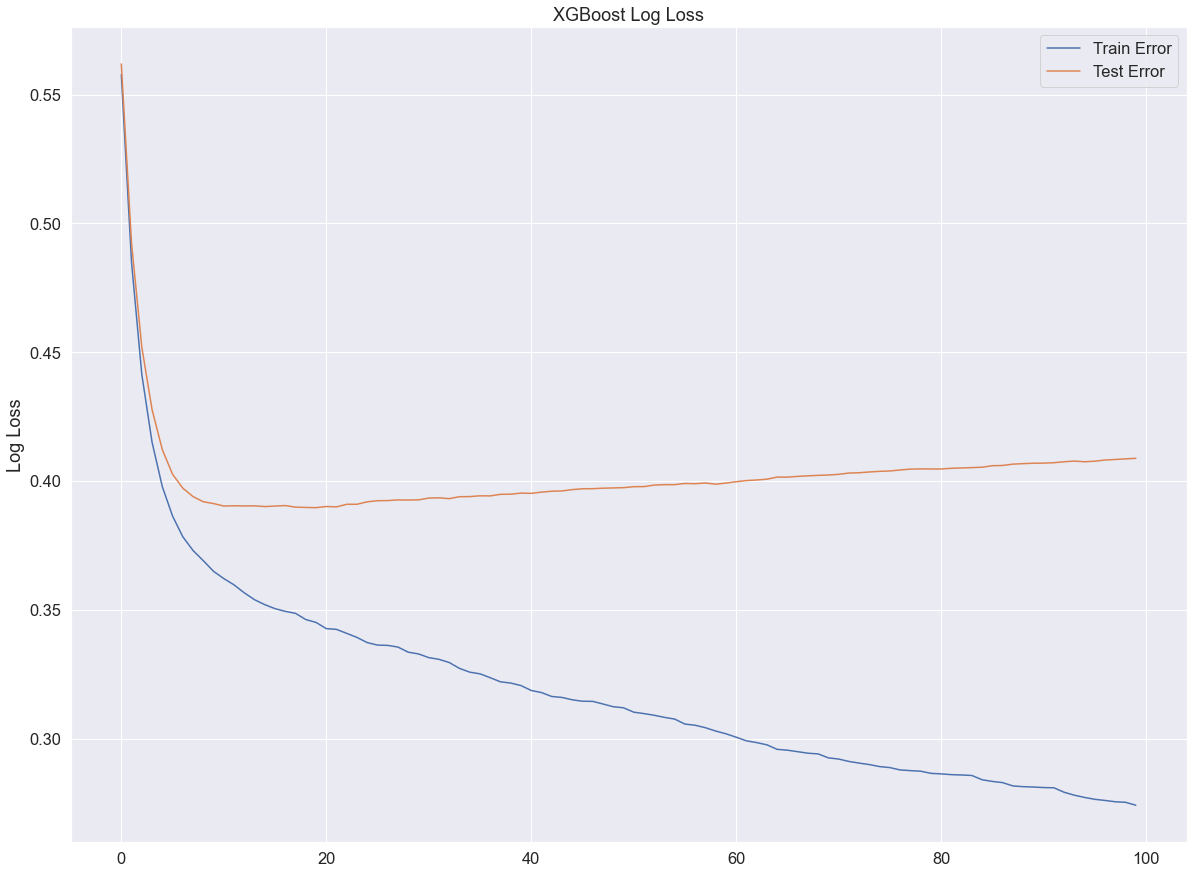

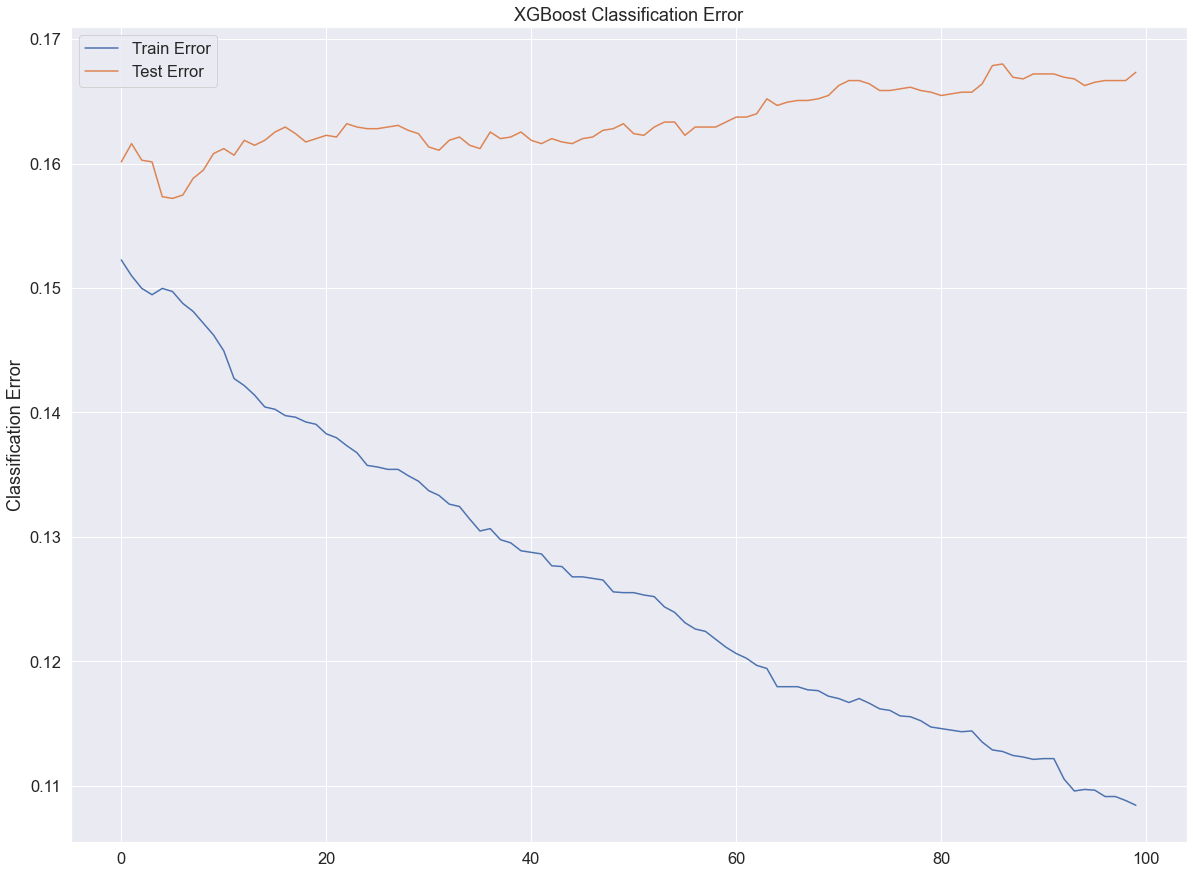

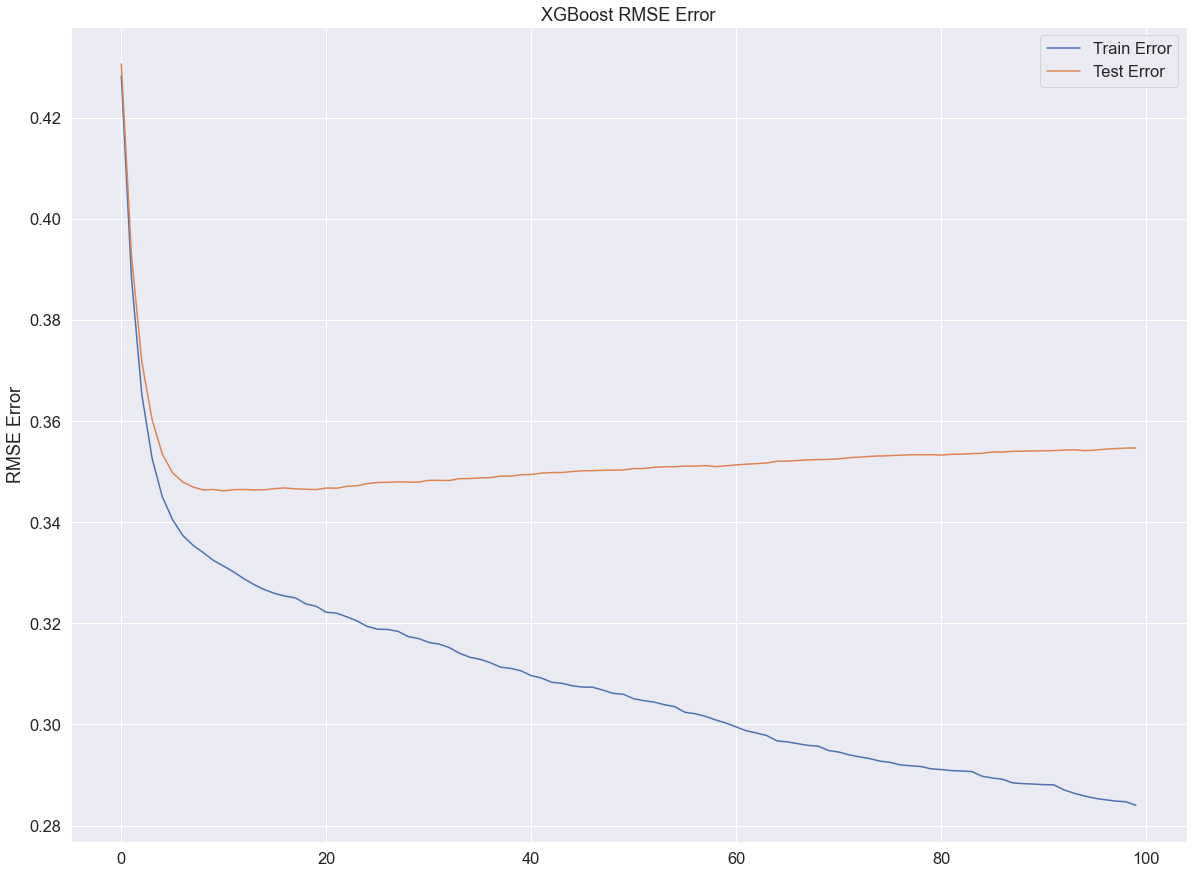

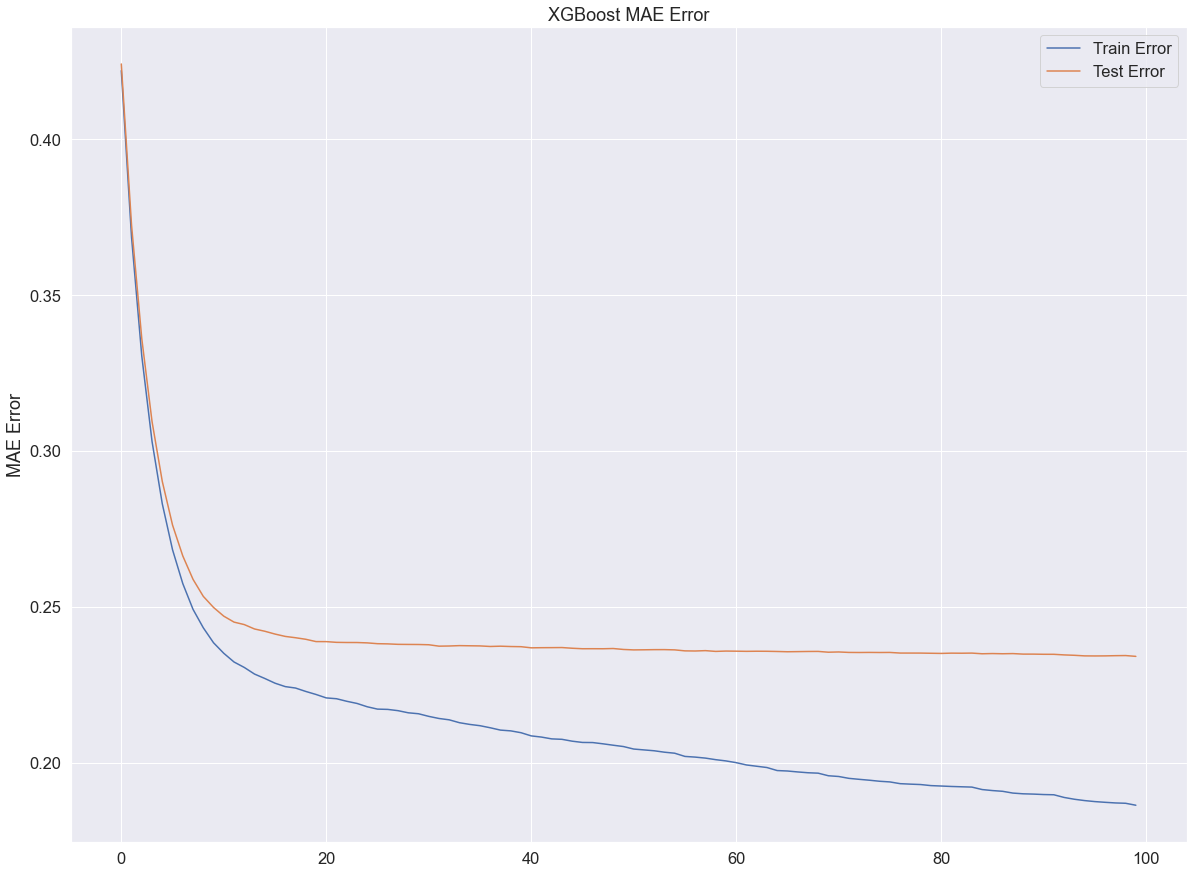

In [164]:
'''
Task 1 : overfitting/underfitting

Comment : There is a sign of overfitting while the test error is getting higher than the training error
          after epoch number 20 and onwards.
          
          List of error calcuations :
          
          1. Log loss 
          2. Classification error
          3. Root Mean Squared Error (RMSE) error
          4. Mean Absolute Error (MAE) error
'''

from sklearn.metrics import accuracy_score
from matplotlib import pyplot

model = XGBClassifier()
eval_set = [(X_train, Y_train), (X_validation, Y_validation)]
#eval_set = [(X_validation, Y_validation)]
model.fit(X_train, Y_train, eval_metric=["error", "logloss", "rmse", "mae"], eval_set=eval_set, verbose=True)
#model.fit(X_train, Y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_validation)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_validation, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train Error')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test Error')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train Error')
ax.plot(x_axis, results['validation_1']['error'], label='Test Error')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# plot Root Mean Squared Error (RMSE) error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train Error')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test Error')
ax.legend()
pyplot.ylabel('RMSE Error')
pyplot.title('XGBoost RMSE Error')
pyplot.show()

# plot Mean Absolute Error (MAE) error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train Error')
ax.plot(x_axis, results['validation_1']['mae'], label='Test Error')
ax.legend()
pyplot.ylabel('MAE Error')
pyplot.title('XGBoost MAE Error')
pyplot.show()

Accuracy: 0.754 (0.004)
Accuracy: 0.751 (0.005)
Accuracy: 0.790 (0.008)
Accuracy: 0.804 (0.009)
Accuracy: 0.814 (0.009)
Accuracy: 0.816 (0.009)
Accuracy: 0.828 (0.010)
Accuracy: 0.831 (0.008)
Accuracy: 0.830 (0.008)
[75.42857142857142, 75.0673015873016, 78.95492063492064, 80.42539682539682, 81.37523809523812, 81.61142857142856, 82.80253968253969, 83.09079365079364, 83.04761904761904]


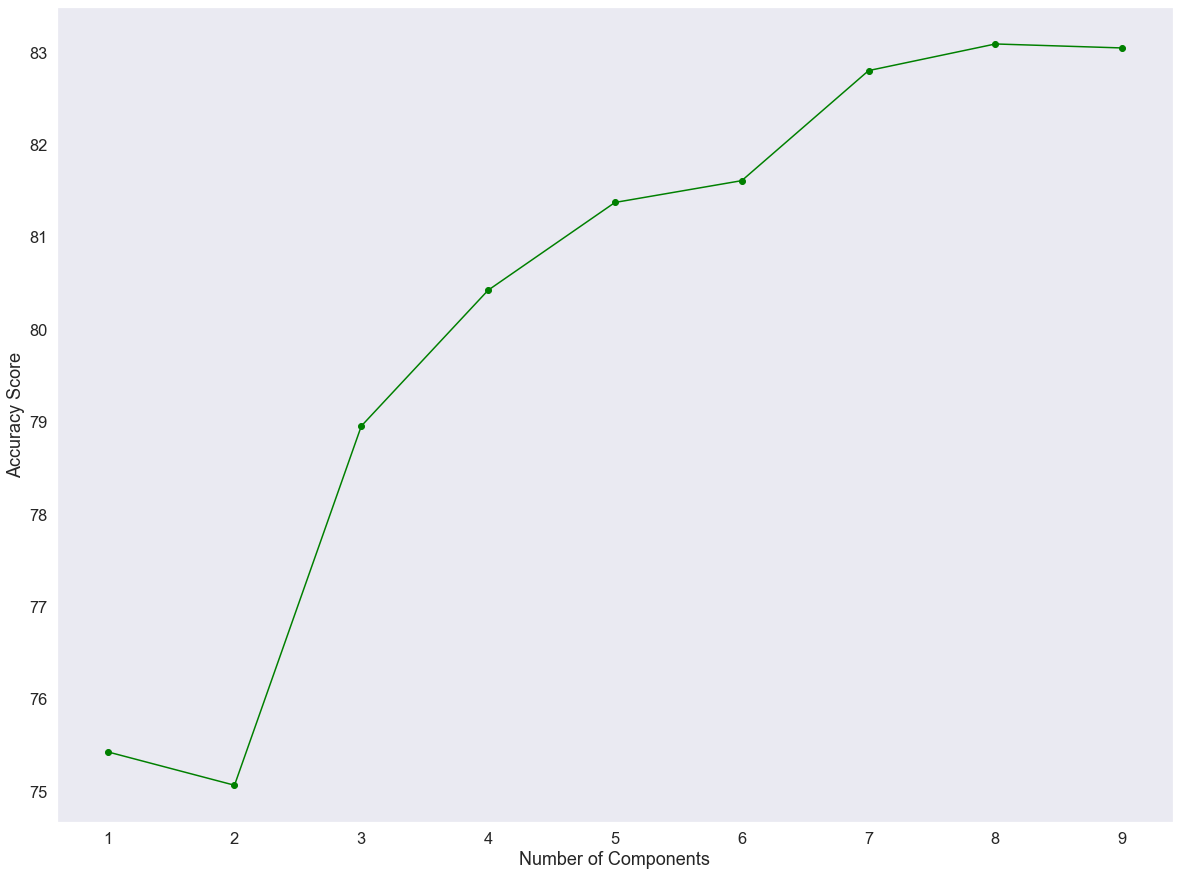

In [159]:
'''
Task 2 : Dimensionality Reduction with Principal Component Analysis (PCA) 

[ Plot has been drawn to show peformance improvement over different components]

Comment : don’t see any lift in model performance in using the PCA comparing with the baseline model performance

'''

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from numpy import mean
from numpy import std
accuracy_score = []

for component in range (1,10):
    steps = [('pca', PCA(n_components=component)), ('m', XGBClassifier())]
    model = Pipeline(steps=steps)
    # evaluate model
    repeated_kfold_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=repeated_kfold_cv, n_jobs=-1)
    # measure performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    accuracy_score.append(mean(n_scores) * 100)

print (accuracy_score)
number_of_components = range(1, 10)
plt.plot(number_of_components, accuracy_score, 'o-', color='green')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Accuracy Score')
plt.show()

Accuracy: 0.754 (0.004)
Accuracy: 0.754 (0.005)
Accuracy: 0.783 (0.007)
Accuracy: 0.804 (0.009)
Accuracy: 0.820 (0.009)
Accuracy: 0.818 (0.008)
Accuracy: 0.833 (0.008)
Accuracy: 0.833 (0.008)
Accuracy: 0.835 (0.007)
[75.43428571428572, 75.40571428571428, 78.26285714285716, 80.41650793650794, 82.02920634920635, 81.8152380952381, 83.25777777777778, 83.33968253968253, 83.52]


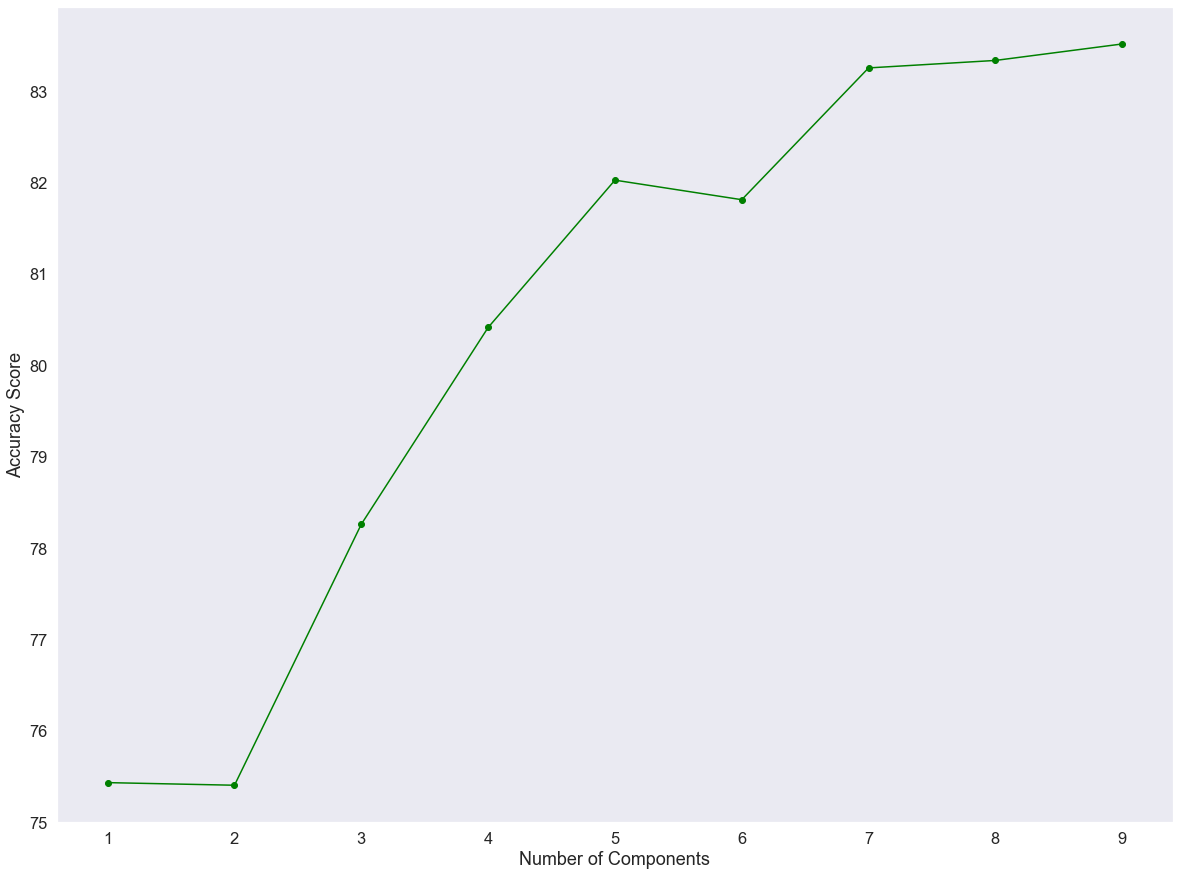

In [161]:
'''
Task 2 : Dimensionality Reduction with Independent component analysis (ICA)

[ Plot has been drawn to show peformance improvement over different components]

Comment : don’t see any lift in model performance in using the ICA comparing with the baseline model performance

'''
from sklearn.decomposition import FastICA 
accuracy_score = []
for component in range (1,10):
    steps = [('ICA', FastICA(n_components=component)), ('m', XGBClassifier())]
    model = Pipeline(steps=steps)
    # evaluate model
    repeated_kfold_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=repeated_kfold_cv, n_jobs=-1)
    # measure performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    accuracy_score.append(mean(n_scores) * 100)
    
print (accuracy_score)
number_of_components = range(1, 10)
plt.plot(number_of_components, accuracy_score, 'o-', color='green')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Accuracy Score')
plt.show()

Accuracy: 0.755 (0.004)
Accuracy: 0.752 (0.005)
Accuracy: 0.765 (0.007)
Accuracy: 0.796 (0.007)
Accuracy: 0.806 (0.008)
Accuracy: 0.811 (0.007)
Accuracy: 0.820 (0.009)
Accuracy: 0.822 (0.008)
[75.46920634920635, 75.20952380952382, 76.51492063492063, 79.56634920634919, 80.58793650793652, 81.10666666666664, 82.00190476190478, 82.24444444444444]


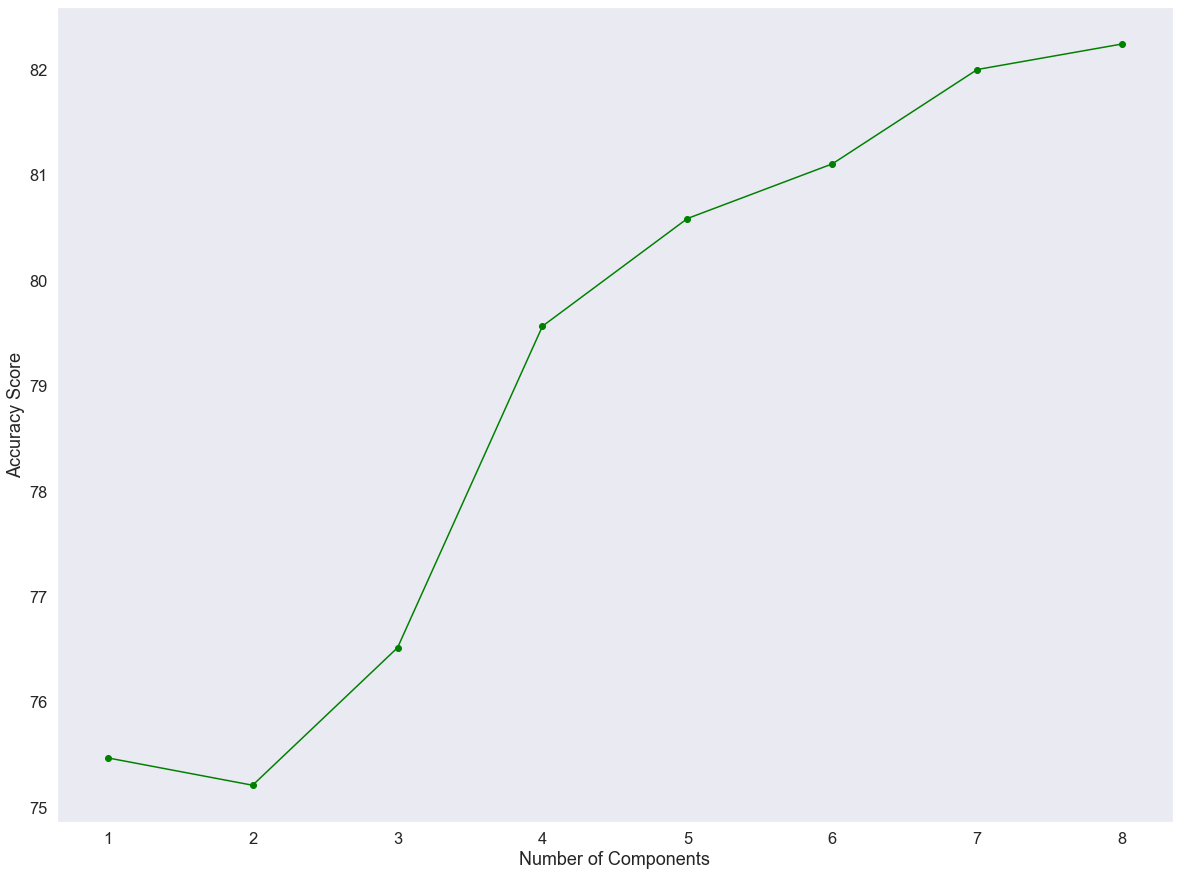

In [162]:
'''
Task 2 : Dimensionality Reduction with Singular Value Decomposition (SVD)

[ Plot has been drawn to show peformance improvement over different components]

Comment : don’t see any lift in model performance in using the SVD comparing with the baseline model performance


'''
from sklearn.decomposition import TruncatedSVD
accuracy_score = []
for component in range (1,9):
    steps = [('svd', TruncatedSVD(n_components=component)), ('m', XGBClassifier())]
    model = Pipeline(steps=steps)
    # evaluate model
    repeated_kfold_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=repeated_kfold_cv, n_jobs=-1)
    # measure performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    accuracy_score.append(mean(n_scores) * 100)
    
print (accuracy_score)
number_of_components = range(1, 9)
plt.plot(number_of_components, accuracy_score, 'o-', color='green')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Accuracy Score')
plt.show()

In [122]:
# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation

# # define model to tackle this single-label, binary classification problem
# model = Sequential()
# model.add(Dense(128, input_dim = X_train.shape[1] , activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# #model.add(Dense(11, activation='softmax'))

# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 128)               1024      
                                                                 
 dense_60 (Dense)            (None, 128)               16512     
                                                                 
 dense_61 (Dense)            (None, 128)               16512     
                                                                 
 dense_62 (Dense)            (None, 128)               16512     
                                                                 
Total params: 50,560
Trainable params: 50,560
Non-trainable params: 0
_________________________________________________________________


In [180]:
'''
Task 3 : Fitting deep learning model

Comment : getting some errors to fit the deep learning model.

'''


input_features = ["Severity of Illness", "Age", "Type of Admission",
                  "Hospital_code", "Department", "Visitors with Patient"]

y_feature = "Stay"
X_train = df_healthcare_1.loc[:, input_features + [y_feature]]

ordered_categories = input_features[0:2]
print (ordered_categories)
unordered_categories = input_features[2:-1]
print (unordered_categories)
num = [input_features[-1]]
print (num)

['Severity of Illness', 'Age']
['Type of Admission', 'Hospital_code', 'Department']
['Visitors with Patient']


In [181]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(Dense(128, input_dim = X_train.shape[1] , activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#model.add(Dense(11, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 128)               1024      
                                                                 
 dense_76 (Dense)            (None, 128)               16512     
                                                                 
 dense_77 (Dense)            (None, 128)               16512     
                                                                 
 dense_78 (Dense)            (None, 128)               16512     
                                                                 
Total params: 50,560
Trainable params: 50,560
Non-trainable params: 0
_________________________________________________________________


In [182]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(X_train)
encoded_Y = encoder.transform(Y_train)
def create_model():
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, encoded_Y, cv=kfold)
print("Model Performance: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ValueError: y should be a 1d array, got an array of shape (25000, 7) instead.

In [183]:
from sklearn.preprocessing import MinMaxScaler
def prepare_dataset():

    # Convert categorical variables to indices
    X_trn = None
    m = MinMaxScaler()

    for column in X_train.columns:
        print(column)
        if column in unordered_categories or column in ordered_categories or column == y_feature:
            _ = pd.factorize(X_train[column], sort=True)[0]
            if column in unordered_categories:
                _ = to_categorical(_, num_classes=X_train[column].unique().size)
            elif column in ordered_categories:
                _ = _/np.max(_)
        else:
            #print(column)
            _ = m.fit_transform(X_train[column].values.reshape(-1,1))[:, 0]

        try:
            print("Xtrn: ", X_trn.shape) 
        except:
            pass
        print("_: ",_.shape)
        
        try:
            if len(_.shape) == 1:
                    print("1D")
                    X_trn = np.hstack((X_trn, _.reshape(-1,1)))
            else:
                X_trn = np.hstack((X_trn, _))  
        except Exception as e:
            print("Error: problem to create shape..")
            if len(_.shape) == 1:
                    print("1D")
                    X_trn = _.reshape(-1,1)
            else:
                X_trn = _

    X_trn = X_trn
    y_trn = X_trn[:, -1]
    X_trn = X_trn[:, :-1]
    y_trn = to_categorical(y_trn, num_classes=df_healthcare_1.Stay.unique().size)
    X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=0.3)

    return X_trn, X_val, y_trn, y_val

In [184]:
X_train, X_test, Y_train, Y_test  = prepare_dataset()
print(X_train)

Severity of Illness
_:  (25000,)
1D
Error: problem to create shape..
1D
Age
Xtrn:  (25000, 1)
_:  (25000,)
1D
Type of Admission
Xtrn:  (25000, 2)
_:  (25000, 3)
Hospital_code
Xtrn:  (25000, 5)
_:  (25000, 32)
Department
Xtrn:  (25000, 37)
_:  (25000, 5)
Visitors with Patient
Xtrn:  (25000, 42)
_:  (25000,)
1D
Stay
Xtrn:  (25000, 43)
_:  (25000,)
1D
[[0.         0.33333333 1.         ... 0.         0.         0.5       ]
 [0.         0.77777778 1.         ... 0.         0.         0.25      ]
 [1.         0.22222222 1.         ... 1.         0.         0.1       ]
 ...
 [1.         0.66666667 0.         ... 1.         0.         0.1       ]
 [0.         0.77777778 1.         ... 0.         0.         0.1       ]
 [1.         0.33333333 0.         ... 0.         0.         0.2       ]]


In [185]:
#X_train=np.asarray(X_train).astype(np.int)
#Y_train=np.asarray(Y_train).astype(np.int)
#X_train = to_categorical(X_train, 3)
#Y_train = to_categorical(Y_train, 3)
#Y_validation = to_categorical(y_test, 3)
model.fit(X_train, Y_train,validation_split = 0.2, batch_size = 225, epochs = 5, shuffle = True, verbose = 2)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Pralgomathic\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Pralgomathic\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Pralgomathic\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Pralgomathic\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Pralgomathic\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Pralgomathic\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_23" is incompatible with the layer: expected shape=(None, 7), found shape=(None, 43)
